# Data storytelling using matplotlib

In [1]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
df_yearly_quantity = duckdb.query(
    """--sql
    SELECT
        year,
        SUM(quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY 
        year
    
    """
).df().set_index("Year").iloc[:-1]

df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


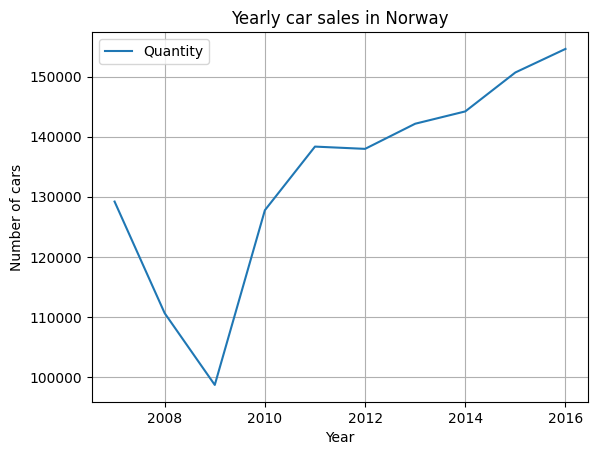

In [8]:
ax = df_yearly_quantity.plot(
    title="Yearly car sales in Norway", ylabel="Number of cars"
)
ax.grid()

##Storytelling on this graph

 Remove clutter

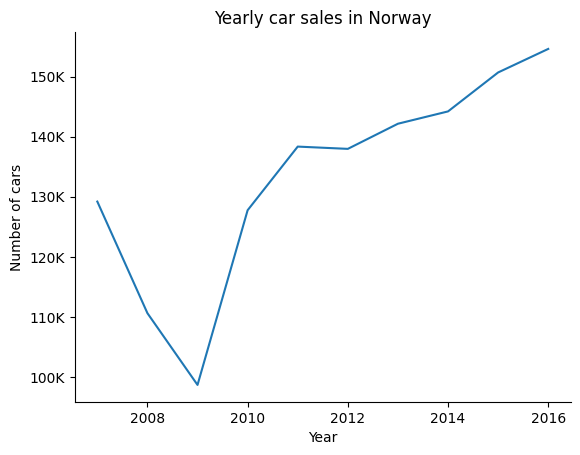

In [ ]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.plot(
    title="Yearly car sales in Norway", ylabel="Number of cars"
)

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False) 
formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)